In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv('./Ice-cream-selling-data-csv_6UnYJ.csv')
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


In [11]:
df.columns

Index(['Temperature (°C)', 'Ice Cream Sales (units)'], dtype='object')

In [12]:
x = df[['Temperature (°C)']]
y = df['Ice Cream Sales (units)']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [21]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((39, 1), (10, 1), (39,), (10,))

In [ ]:
# feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

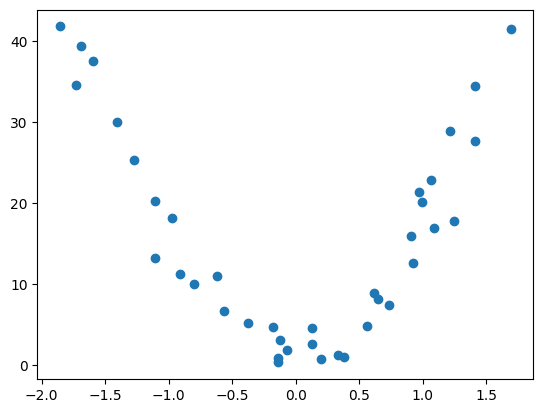

In [24]:
plt.scatter(x_train_scaled,y_train)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
poly_model1 = make_pipeline(PolynomialFeatures(degree=3),LinearRegression())
poly_model2 = make_pipeline(PolynomialFeatures(degree=4),LinearRegression())
poly_model3 = make_pipeline(PolynomialFeatures(degree=5),LinearRegression())
poly_model4 = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())
poly_model5 = make_pipeline(PolynomialFeatures(degree=15),LinearRegression())

poly_model1.fit(x_train_scaled,y_train)
poly_model2.fit(x_train_scaled,y_train)
poly_model3.fit(x_train_scaled,y_train)
poly_model4.fit(x_train_scaled,y_train)
poly_model5.fit(x_train_scaled,y_train)




Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=15)),
                ('linearregression', LinearRegression())])

In [29]:
from sklearn.metrics import r2_score

model1_score = r2_score(y_test,poly_model1.predict(x_test_scaled))
model2_score = r2_score(y_test,poly_model2.predict(x_test_scaled))
model3_score = r2_score(y_test,poly_model3.predict(x_test_scaled))
model4_score = r2_score(y_test,poly_model4.predict(x_test_scaled))
model5_score = r2_score(y_test,poly_model5.predict(x_test_scaled))

In [34]:
import pickle
with open('selling_pred.pkl','wb') as f:
    pickle.dump((poly_model4,scaler),f)